**Importing Libraries**

In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [3]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [4]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [5]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_immunity = df_pathway[Immunity]

# Concatenate the additional columns
df_immunity = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_immunity], axis=1)

In [6]:
df_immunity.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,C2,C3
0,1_50:60_F,Female,50-60,86.0,87.0
1,2_50:60_F,Female,50-60,89.0,108.8
2,3_40:50_F,Female,40-50,88.0,100.6
3,4_40:50_F,Female,40-50,84.0,102.0
4,5_50:60_F,Female,50-60,98.0,113.0


In [7]:
print(df_immunity.shape)   # dataset rows & columns
df_immunity.columns        # columns of the dataset

(500, 5)


Index(['Samples', 'Gender', 'Age_Group', 'C2', 'C3'], dtype='object')

In [8]:
df_immunity.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   C2         500 non-null    float64
 4   C3         500 non-null    float64
dtypes: float64(2), object(3)
memory usage: 19.7+ KB


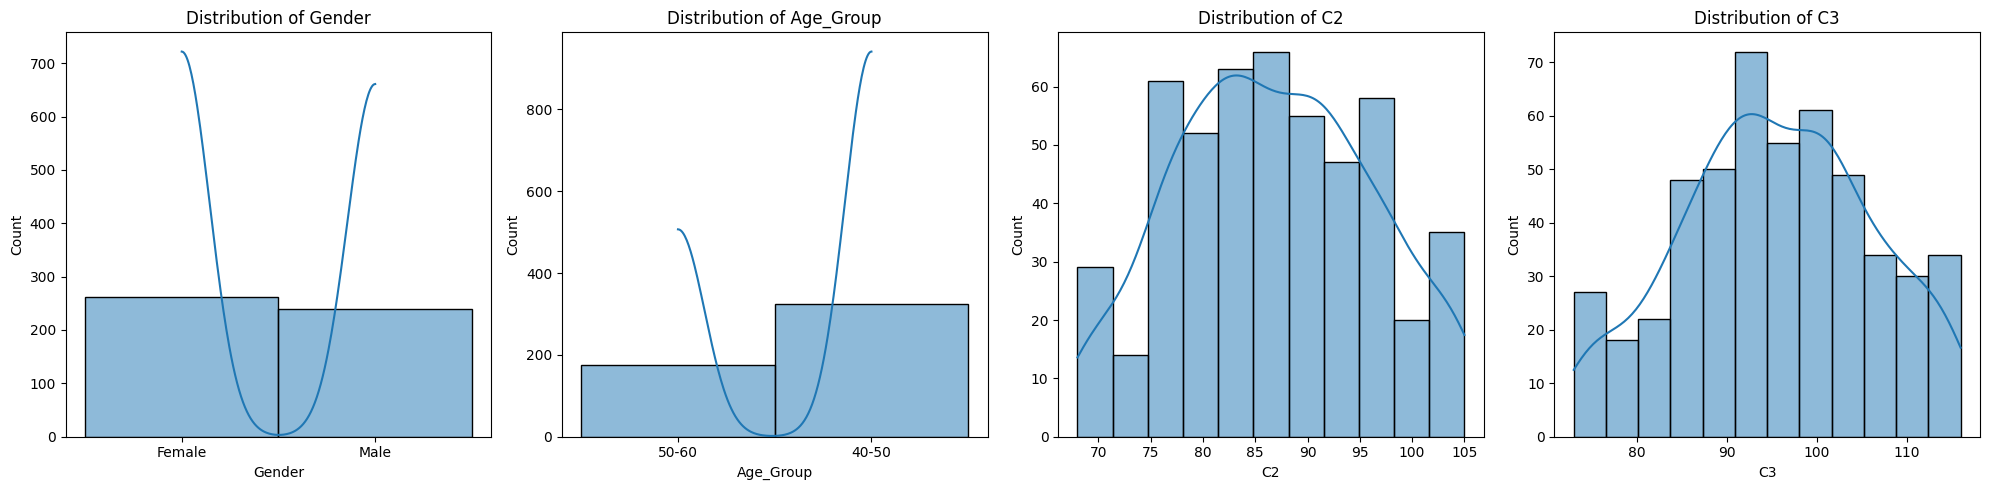

In [9]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_immunity.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_immunity.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_immunity[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

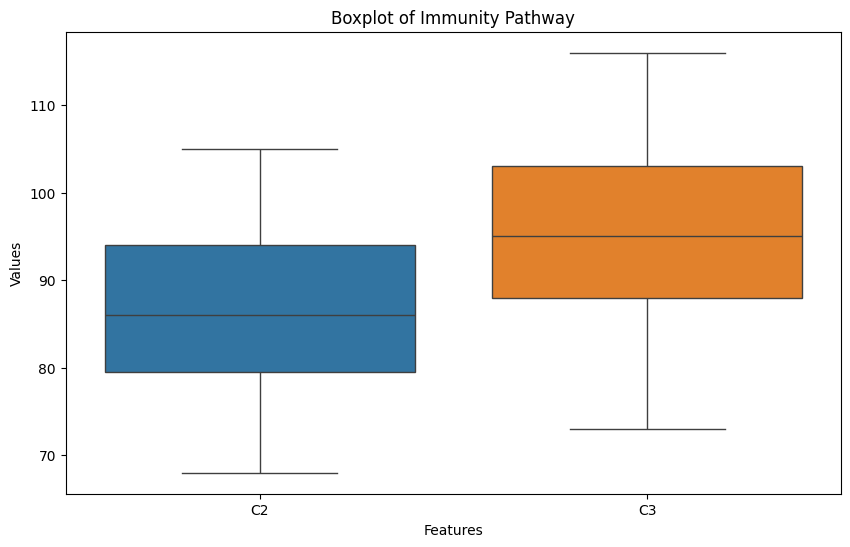

In [10]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_immunity)

plt.title("Boxplot of Immunity Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


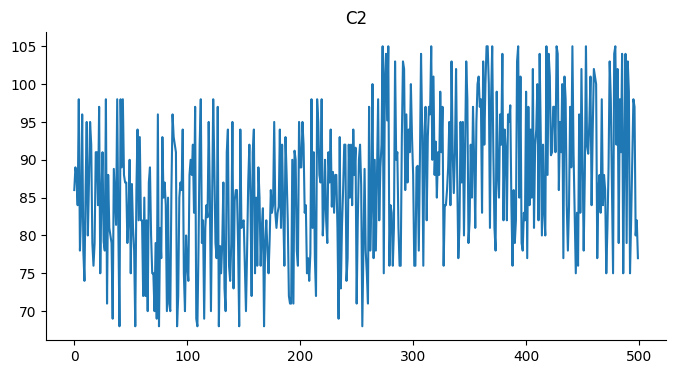

In [11]:
# C2 in samples

df_immunity['C2'].plot(kind='line', figsize=(8, 4), title='C2')
plt.gca().spines[['top', 'right']].set_visible(False)

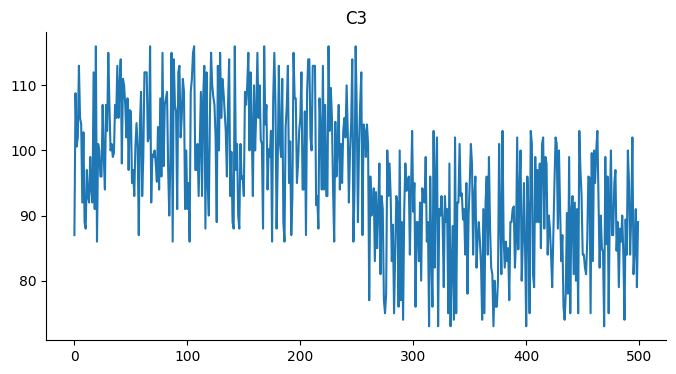

In [12]:
# C3 in samples

df_immunity['C3'].plot(kind='line', figsize=(8, 4), title='C3')
plt.gca().spines[['top', 'right']].set_visible(False)

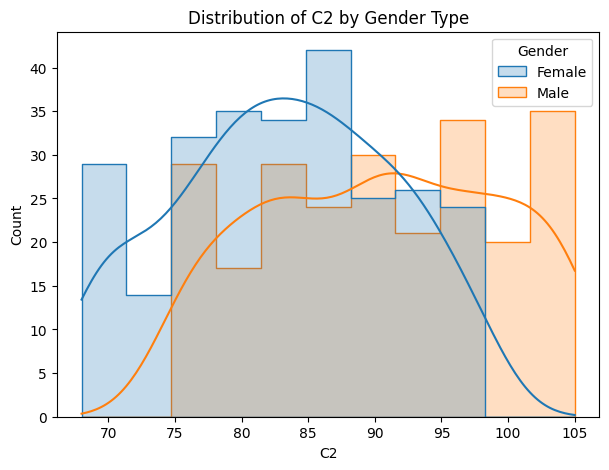

In [13]:
# Distribution plot for 'C2'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_immunity, x='C2', hue='Gender', kde=True, element="step")
plt.title('Distribution of C2 by Gender Type')
plt.show()

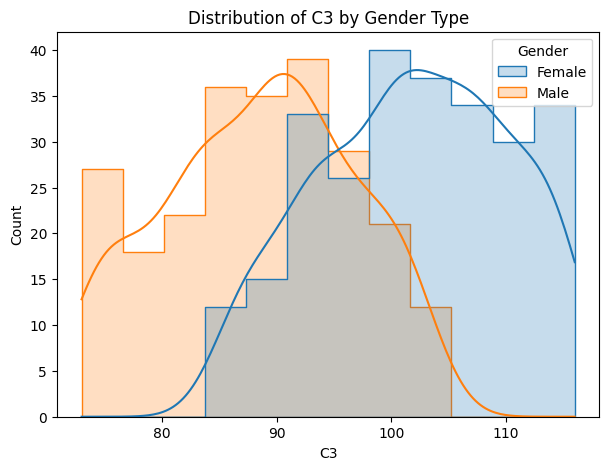

In [14]:
# Distribution plot for C3
plt.figure(figsize=(7, 5))
sns.histplot(data=df_immunity, x='C3', hue='Gender', kde=True, element="step")
plt.title('Distribution of C3 by Gender Type')
plt.show()

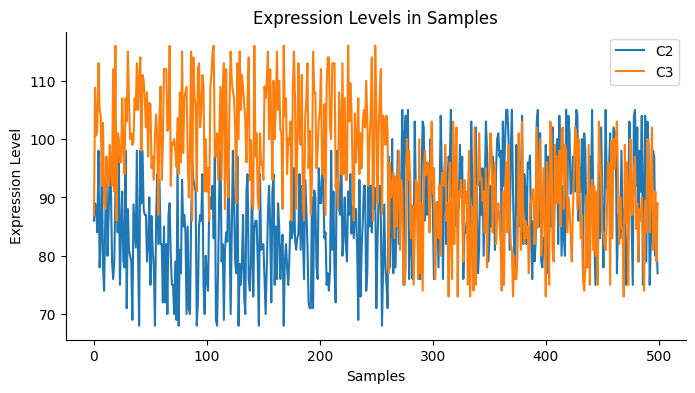

In [15]:
# Plotting proteins
df_immunity[['C2', 'C3']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [16]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_immunity.columns[3:]:
    expression_data = df_immunity[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [17]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
C2,100.0,86.717,9.328,10.757
C3,100.0,95.531,10.660,11.159


In [18]:
df_corr = df_immunity.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,C2,C3
C2,1.000000,-0.187757
C3,-0.187757,1.000000


These genes may have distinct roles in the immunity pathway and may not be closely regulated together.

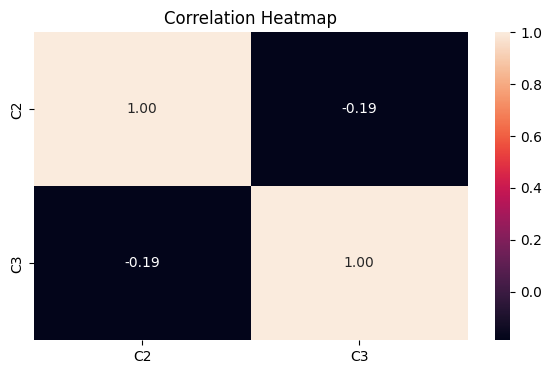

In [19]:
# Correlation Heatmap
plt.figure(figsize=(7, 4))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [20]:
# Segregate data by gender and age group
males = df_immunity[df_immunity['Gender'] == 'Male']
females = df_immunity[df_immunity['Gender'] == 'Female']

age_40_50 = df_immunity[df_immunity['Age_Group'] == '40-50']
age_50_60 = df_immunity[df_immunity['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_immunity.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['C2', 'C3']
Proteins with significant differences between age groups: []


In [21]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 2
Number of significant proteins: 0


In [22]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Immunity"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


Summary Statistics for Immunity Pathway:
                         C2                           C3                 
                       mean median       std        mean median       std
Gender Age_Group                                                         
Female 40-50      82.915909   83.7  8.272155  101.806818  102.0  8.285806
       50-60      83.731765   83.0  8.025647  102.404706  102.8  8.313212
Male   40-50      90.130201   91.0  8.889804   87.916779   89.0  8.170881
       50-60      91.320000   91.2  9.112865   89.373333   89.7  8.215644


<ipython-input-22-74d619975c73>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


In [23]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

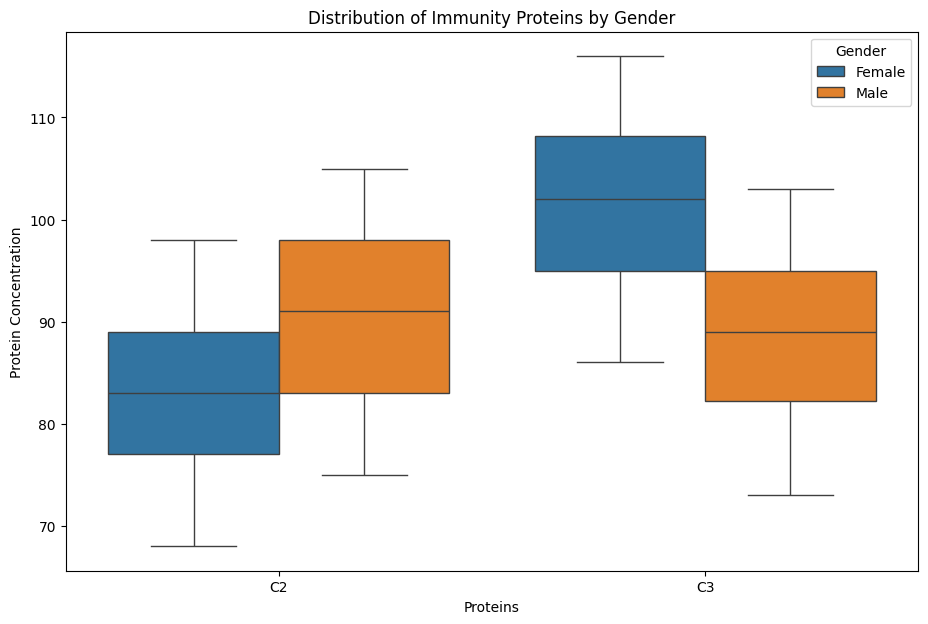

In [24]:
# Visualization: Distribution by Gender
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

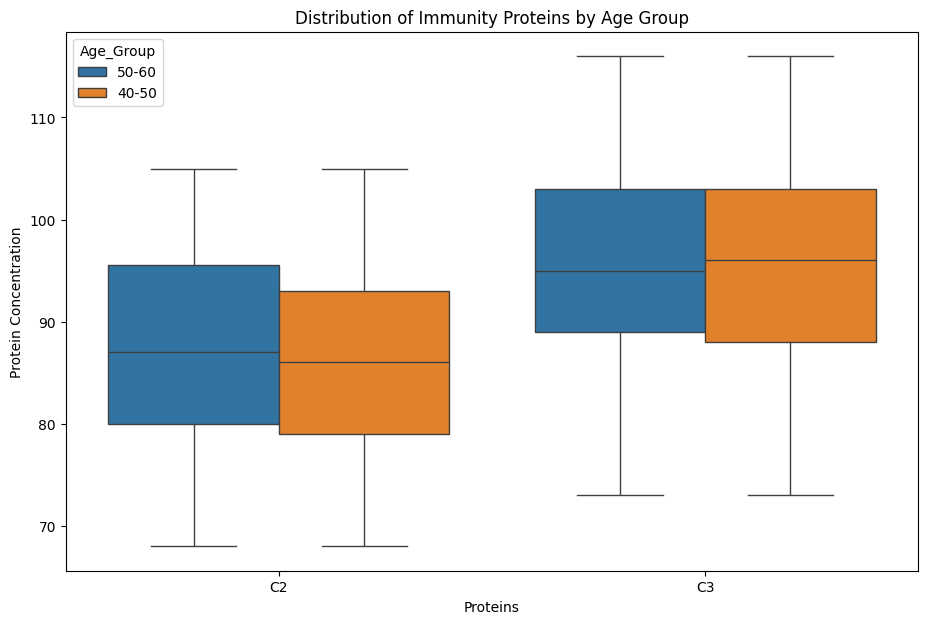

In [25]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [26]:
p_columns = df_immunity.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_immunity.copy()
df_normalized[p_columns] = scaler.fit_transform(df_immunity[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

    Moderately Expressed  Highly Expressed  Lowly Expressed
C2                   249               127              124
C3                   292               118               90


In [27]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,C2,249,127,124
1,C3,292,118,90


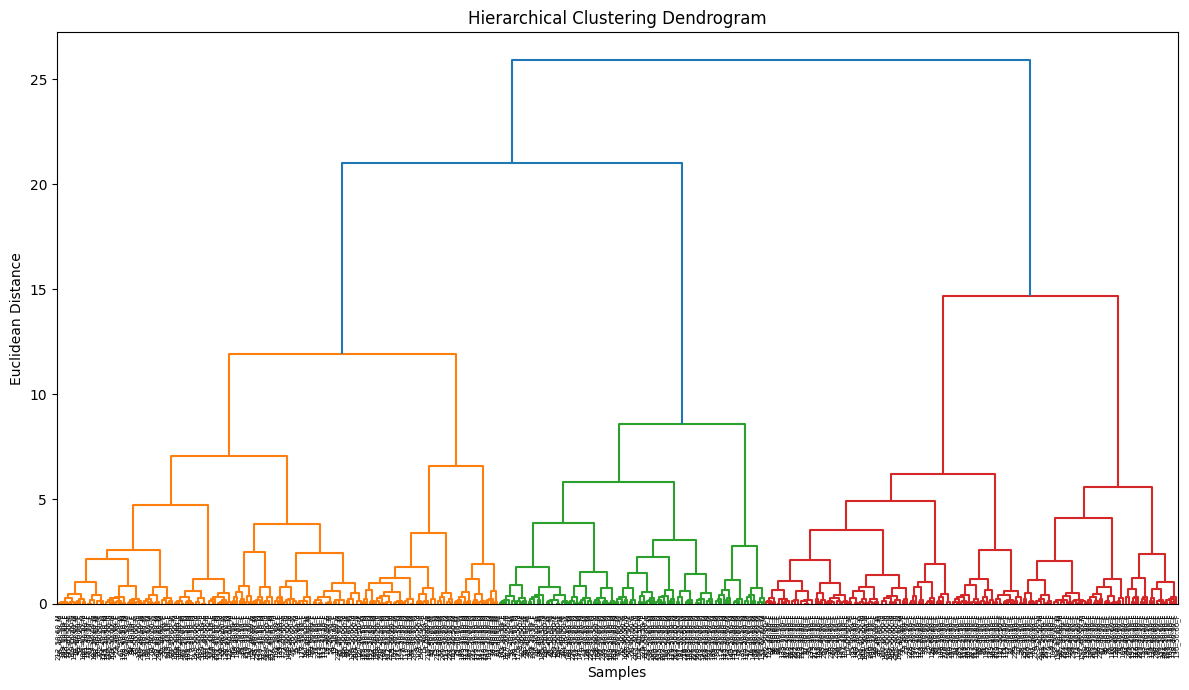

In [28]:
# Select only the protein columns for clustering
protein_columns = ["C2", "C3"]
df_proteins = df_immunity[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_immunity['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [29]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_immunity['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['2_50:60_F', '3_40:50_F', '5_50:60_F', '6_50:60_F', '7_40:50_F', '9_50:60_F', '15_40:50_F', '18_40:50_F', '20_40:50_F', '26_40:50_F', '27_40:50_F', '29_50:60_F', '30_40:50_F', '31_40:50_F', '32_40:50_F', '33_50:60_F', '34_40:50_F', '35_40:50_F', '36_50:60_F', '37_40:50_F', '38_40:50_F', '39_50:60_F', '40_40:50_F', '41_40:50_F', '42_40:50_F', '43_40:50_F', '44_50:60_F', '45_40:50_F', '46_40:50_F', '47_40:50_F', '48_50:60_F', '50_40:50_F', '51_40:50_F', '55_40:50_F', '56_50:60_F', '57_40:50_F', '59_40:50_F', '60_40:50_F', '62_40:50_F', '63_40:50_F', '64_40:50_F', '65_40:50_F', '66_40:50_F', '67_40:50_F', '68_40:50_F', '72_40:50_F', '73_40:50_F', '74_40:50_F', '75_40:50_F', '76_50:60_F', '77_40:50_F', '79_50:60_F', '81_40:50_F', '82_40:50_F', '83_50:60_F', '86_40:50_F', '87_40:50_F', '89_40:50_F', '90_40:50_F', '91_40:50_F', '93_40:50_F', '94_40:50_F', '95_40:50_F', '96_50:60_F', '97_40:50_F', '98_40:50_F', '100_40:50_F', '104_40:50_F', '105_40:50_F', '106_50:60_F', '107_40:50

In [30]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
3,197
1,184
2,119


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

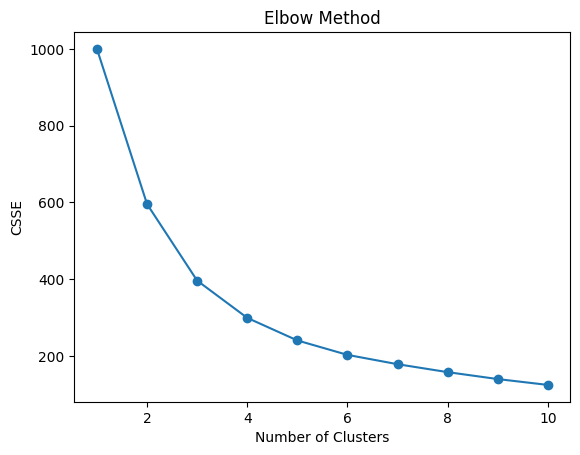

In [31]:
pro_columns = df_immunity.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_immunity[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [32]:
csse

[1000.0000000000013,
 595.6831758727076,
 396.34810969845864,
 299.2531837866246,
 240.4466861358147,
 202.8586992185255,
 178.55149372605882,
 157.87063112610156,
 139.82298530576702,
 124.573778392432]

In [33]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_immunity.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[2 0 0 0 0 0 0 1 0 2 2 1 2 2 1 1 2 0 2 0 1 0 1 2 2 0 2 2 0 2 0 0 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 2 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 2
 0 2 0 2 0 0 0 0 0 2 2 2 0 1 0 0 0 2 0 0 0 0 0 0 2 2 2 2 1 0 0 0 0 1 2 2 2
 0 0 2 0 0 2 0 2 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 1 0 0 2 2 1 2 0 0 0 2 2 0
 2 2 2 0 0 0 0 0 0 2 1 0 2 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 2 0 0 2 0
 2 2 0 0 0 2 2 2 1 0 0 0 2 2 0 0 0 1 1 0 2 0 0 0 0 1 0 0 0 2 1 1 0 0 1 0 2
 0 2 2 0 0 0 0 1 2 0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0 1 1 0 0 2 0 0 0 2 0 0 2
 0 2 1 2 2 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2 1 1 1 2 2 2 1 1 1 0 1 2
 1 1 1 0 1 2 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 1 1
 2 1 1 1 0 1 1 2 0 1 2 1 2 1 1 1 2 2 0 0 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 0 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2 0 0 1
 2 0 1 1 2 1 1 0 0 2 2 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 2 1 1 2 2 0 1 1 1 1 2
 2 2 2 0 2 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0 2 1 2 1 2 1 0 2 2 1 1 1 1 2 1 1 1
 1 2 1 1 1 2 1 1 2 1 1 2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,C2,C3,Cluster
0,1_50:60_F,Female,50-60,86.0,87.0,2
1,2_50:60_F,Female,50-60,89.0,108.8,0
2,3_40:50_F,Female,40-50,88.0,100.6,0
3,4_40:50_F,Female,40-50,84.0,102.0,0
4,5_50:60_F,Female,50-60,98.0,113.0,0
...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,98.0,81.0,1
496,236_40:50_M,Male,40-50,97.0,85.0,1
497,237_50:60_M,Male,50-60,80.0,91.0,2
498,238_40:50_M,Male,40-50,82.0,79.0,2


In [34]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['2_50:60_F', '3_40:50_F', '4_40:50_F', '5_50:60_F', '6_50:60_F', '7_40:50_F', '9_50:60_F', '18_40:50_F', '20_40:50_F', '22_40:50_F', '26_40:50_F', '29_50:60_F', '31_40:50_F', '32_40:50_F', '34_40:50_F', '36_50:60_F', '37_40:50_F', '38_40:50_F', '39_50:60_F', '40_40:50_F', '41_40:50_F', '42_40:50_F', '43_40:50_F', '44_50:60_F', '45_40:50_F', '46_40:50_F', '47_40:50_F', '48_50:60_F', '50_40:50_F', '51_40:50_F', '56_50:60_F', '57_40:50_F', '59_40:50_F', '60_40:50_F', '63_40:50_F', '64_40:50_F', '65_40:50_F', '67_40:50_F', '68_40:50_F', '75_40:50_F', '77_40:50_F', '79_50:60_F', '80_40:50_F', '81_40:50_F', '82_40:50_F', '83_50:60_F', '87_40:50_F', '89_40:50_F', '90_40:50_F', '91_40:50_F', '93_40:50_F', '94_40:50_F', '95_40:50_F', '96_50:60_F', '97_40:50_F', '98_40:50_F', '104_40:50_F', '105_40:50_F', '106_50:60_F', '107_40:50_F', '112_40:50_F', '113_50:60_F', '115_40:50_F', '116_50:60_F', '118_40:50_F', '121_40:50_F', '122_50:60_F', '123_40:50_F', '124_50:60_F', '125_40:50_F', '

In [35]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
0,171
1,167
2,162


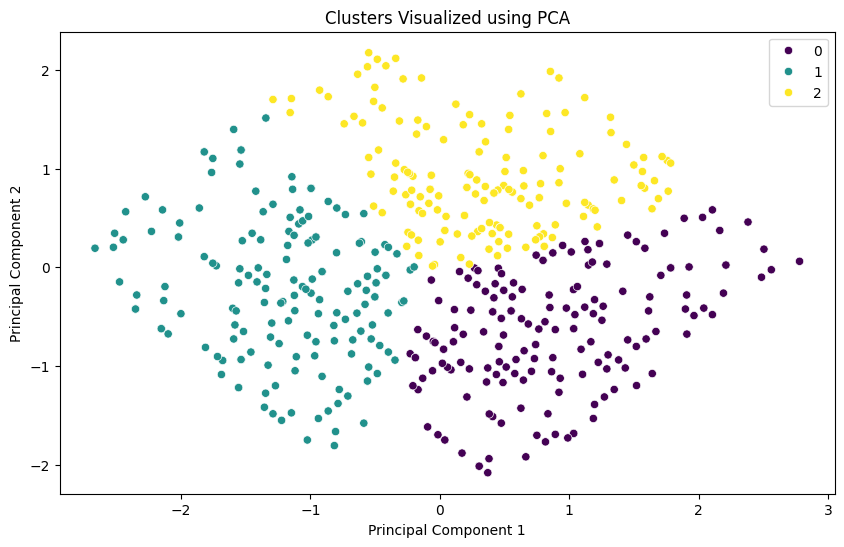

In [36]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()